In [1]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    balanced_accuracy_score,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

np.random.seed(42)
pd.set_option("display.max_rows", 80)
pd.set_option("display.width", 1920)
pd.set_option("display.float_format", "{:20,.2f}".format)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
plt.rcParams["figure.dpi"] = 150


In [2]:
df = pd.read_csv("./normalized_nybnb.csv").astype(np.float32)
X, y = df.drop(columns=["High Review Score"]), df["High Review Score"]

ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    random_state=42,
    stratify=y,
)

target_names = ["Low", "High"]
n_features = X_train.shape[1]


In [3]:
classifiers = {
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(solver="liblinear", multi_class="ovr"),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}
for cls in classifiers.keys():
    classifiers[cls].fit(X_train, y_train)
    print(cls, classifiers[cls])


Naive Bayes GaussianNB()
KNN KNeighborsClassifier()
Logistic Regression LogisticRegression(multi_class='ovr', solver='liblinear')
Decision Tree DecisionTreeClassifier()
Random Forest RandomForestClassifier()


Test metrics
Naive Bayes
Accuracy :  0.5786202610316967
Balanced Accuracy :  0.5787684249559655
              precision    recall  f1-score   support

         Low       0.65      0.34      0.45       805
        High       0.55      0.82      0.66       804

    accuracy                           0.58      1609
   macro avg       0.60      0.58      0.55      1609
weighted avg       0.60      0.58      0.55      1609

[[274 531]
 [147 657]]
KNN
Accuracy :  0.6022374145431946
Balanced Accuracy :  0.6022442137140385
              precision    recall  f1-score   support

         Low       0.60      0.59      0.60       805
        High       0.60      0.61      0.61       804

    accuracy                           0.60      1609
   macro avg       0.60      0.60      0.60      1609
weighted avg       0.60      0.60      0.60      1609

[[476 329]
 [311 493]]
Logistic Regression
Accuracy :  0.6239900559353636
Balanced Accuracy :  0.6240281511696177
              precision    recall  f1-

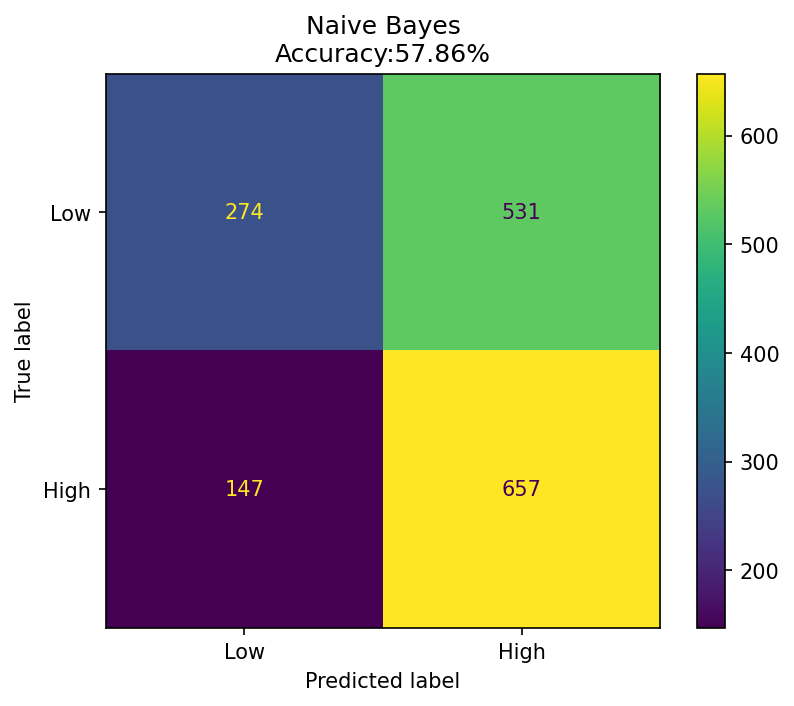

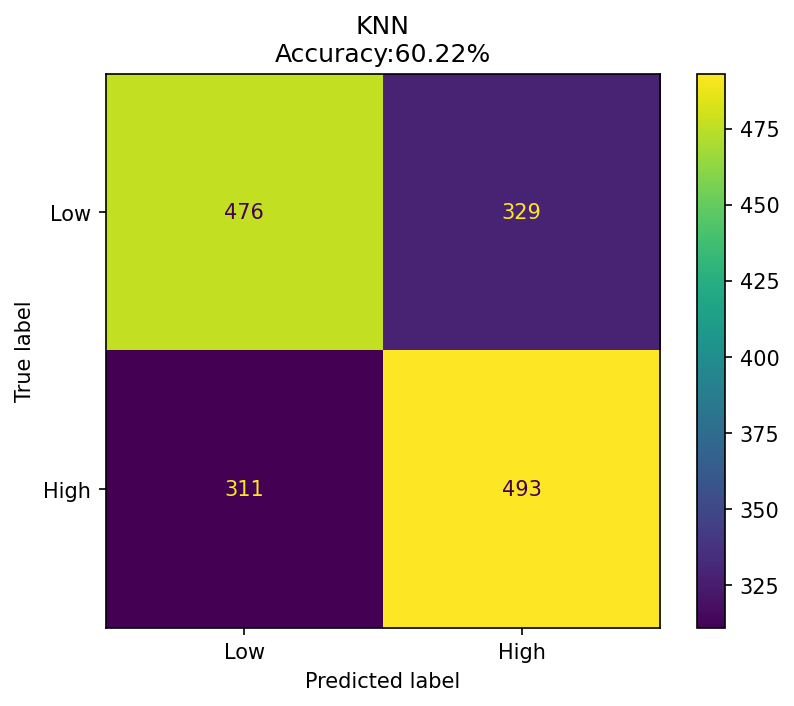

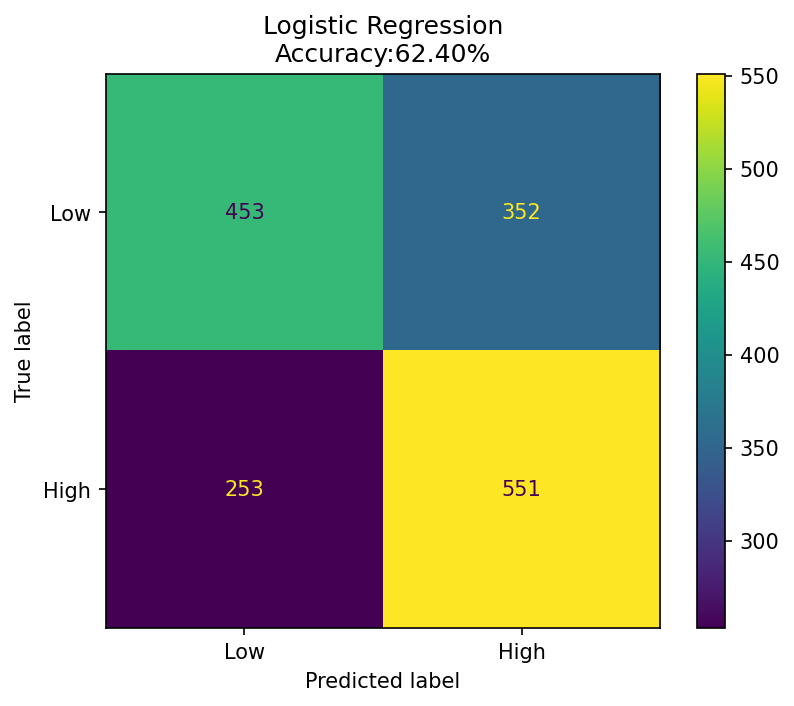

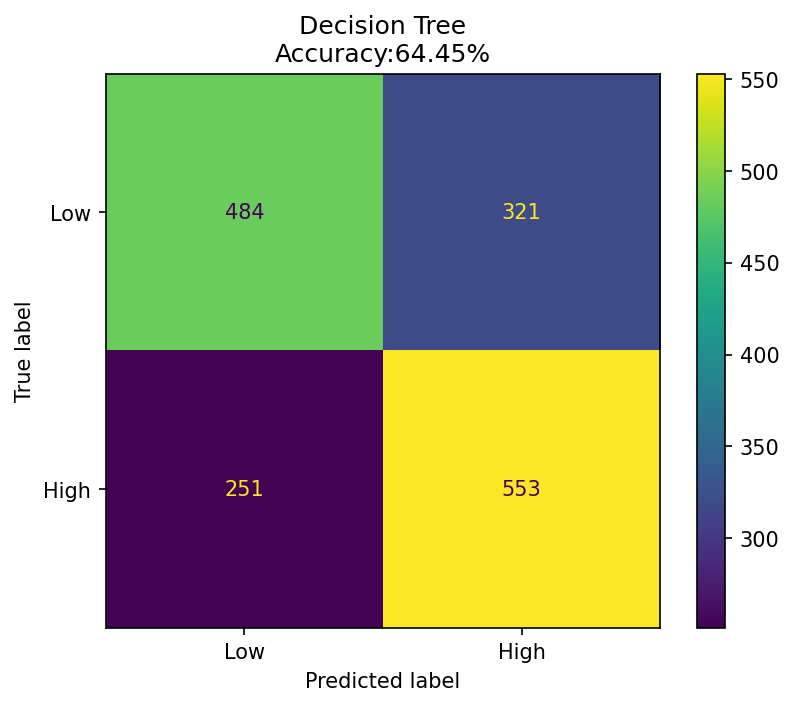

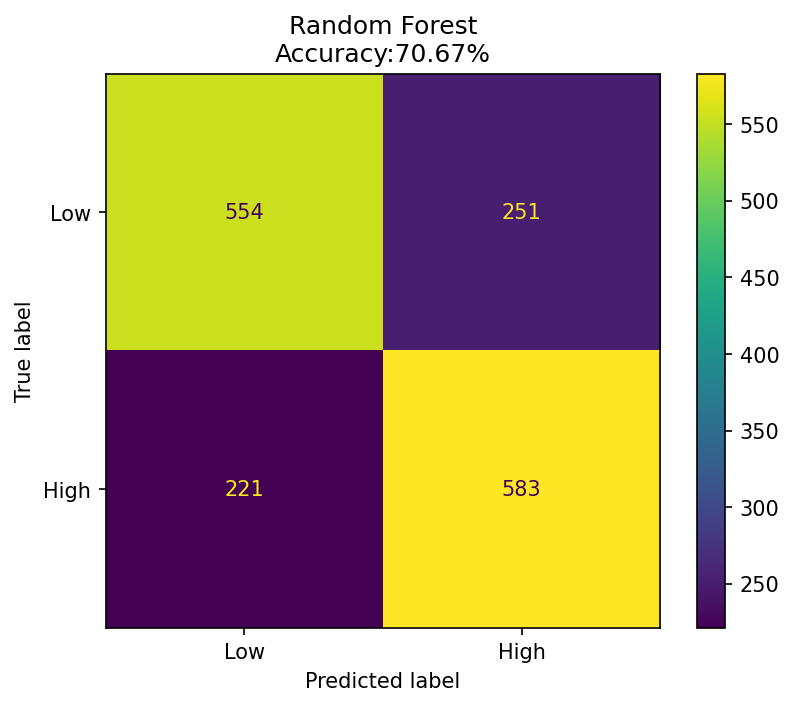

In [7]:
print('Test metrics')
for name, cls in classifiers.items():
    print(name)
    pred = cls.predict(X_test)
    print("Accuracy : ", acc := accuracy_score(y_test, pred))
    print("Balanced Accuracy : ", balanced_accuracy_score(y_test, pred))
    print(classification_report(y_test, pred, target_names=target_names))
    print(cm := confusion_matrix(y_test, pred))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot()
    disp.ax_.set_title(f"{name}\nAccuracy:{acc * 100:.2f}%")


Text(0.5, 1.0, 'Feature Importances for Random Forest')

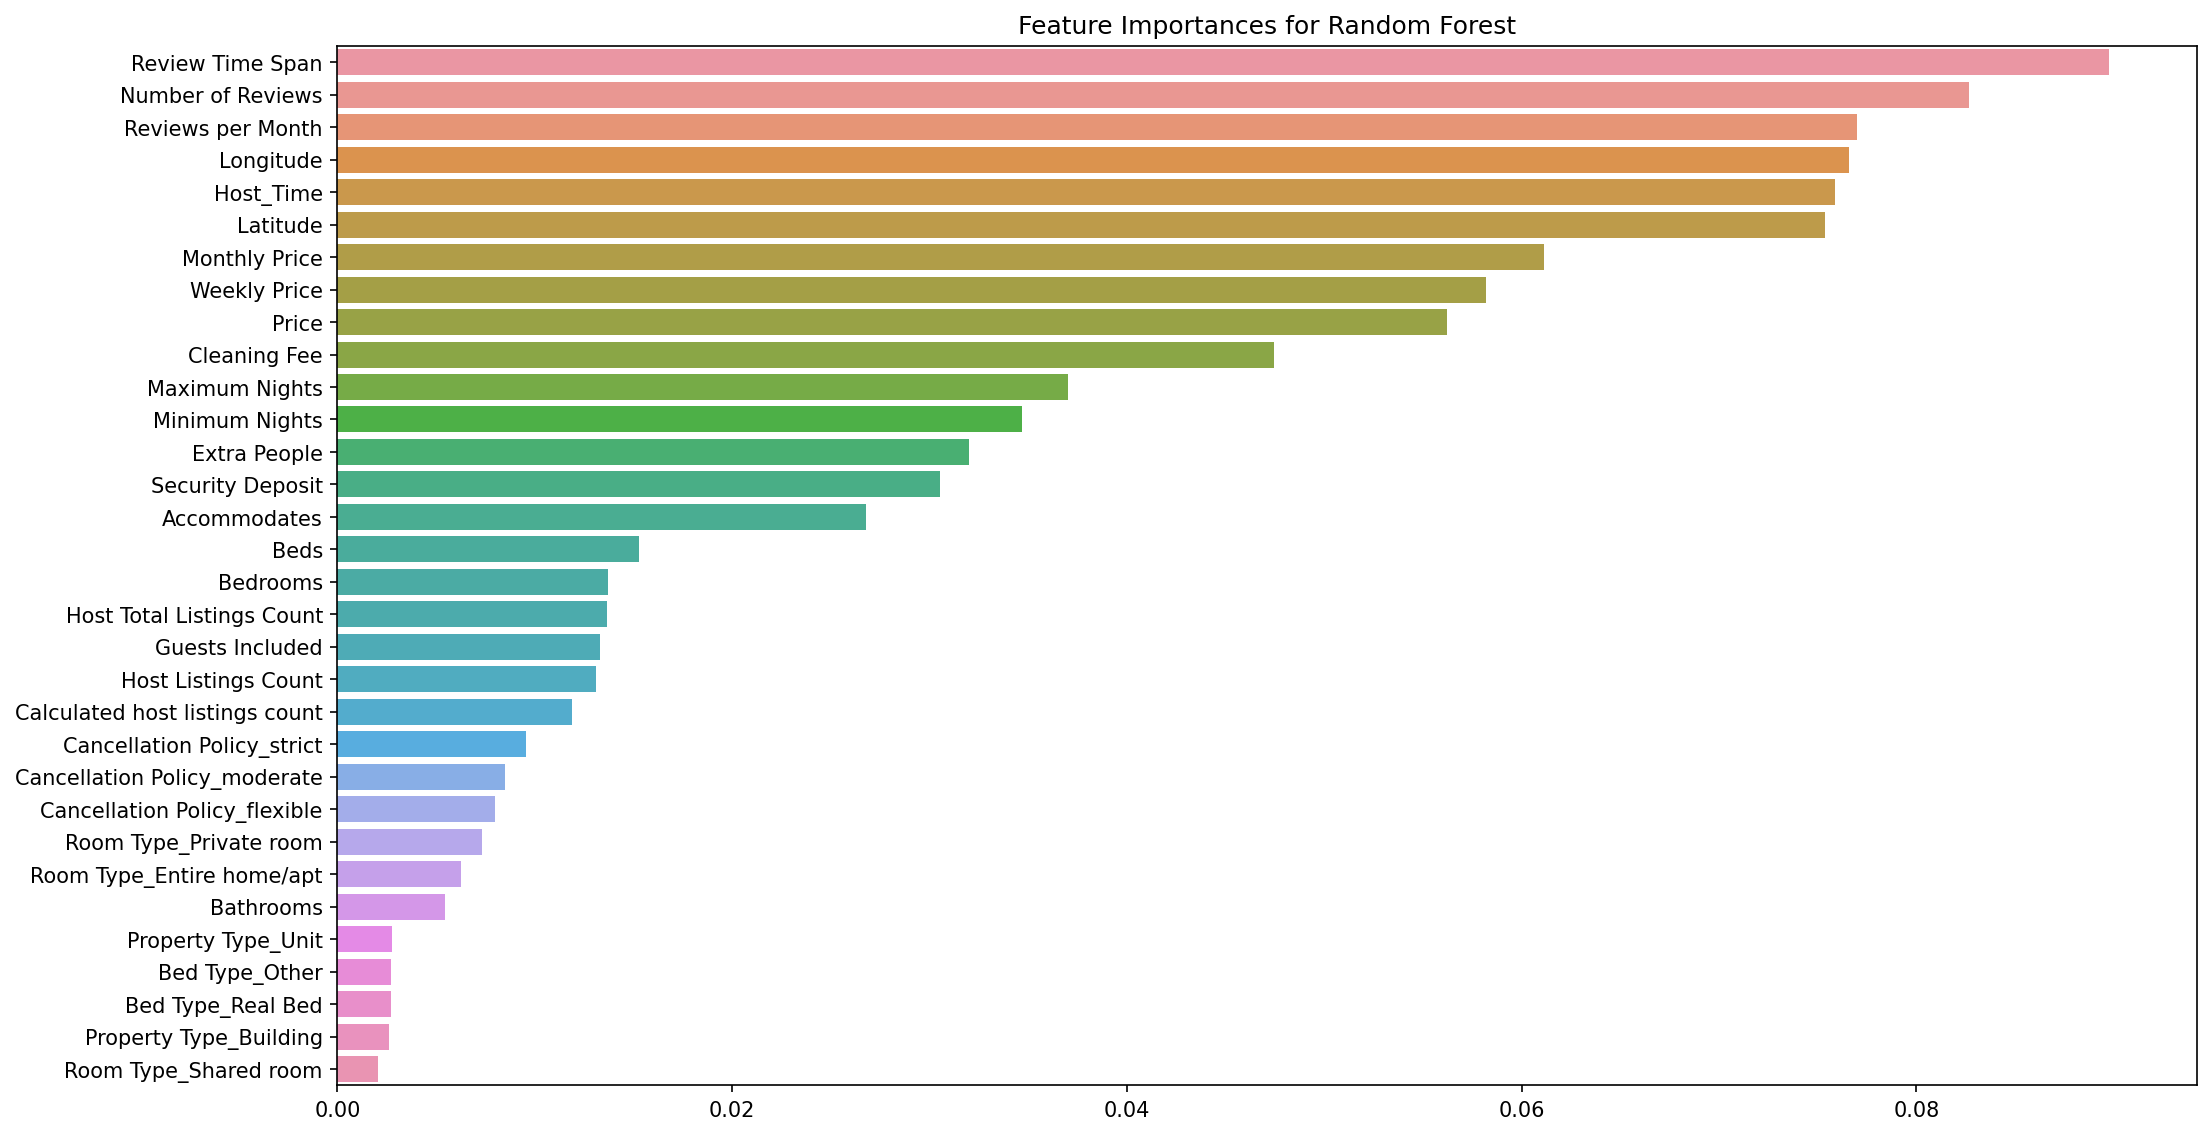

In [5]:
import seaborn as sns
rf = classifiers["Random Forest"]
feature_importances = pd.DataFrame(np.expand_dims(rf.feature_importances_, axis=0), columns=X.columns.tolist()).sort_values(by = 0, axis = 1, ascending=False)
f, ax = plt.subplots(figsize=(16, 9))
fi = sns.barplot(feature_importances, orient='h')
fi.set_title('Feature Importances for Random Forest')

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

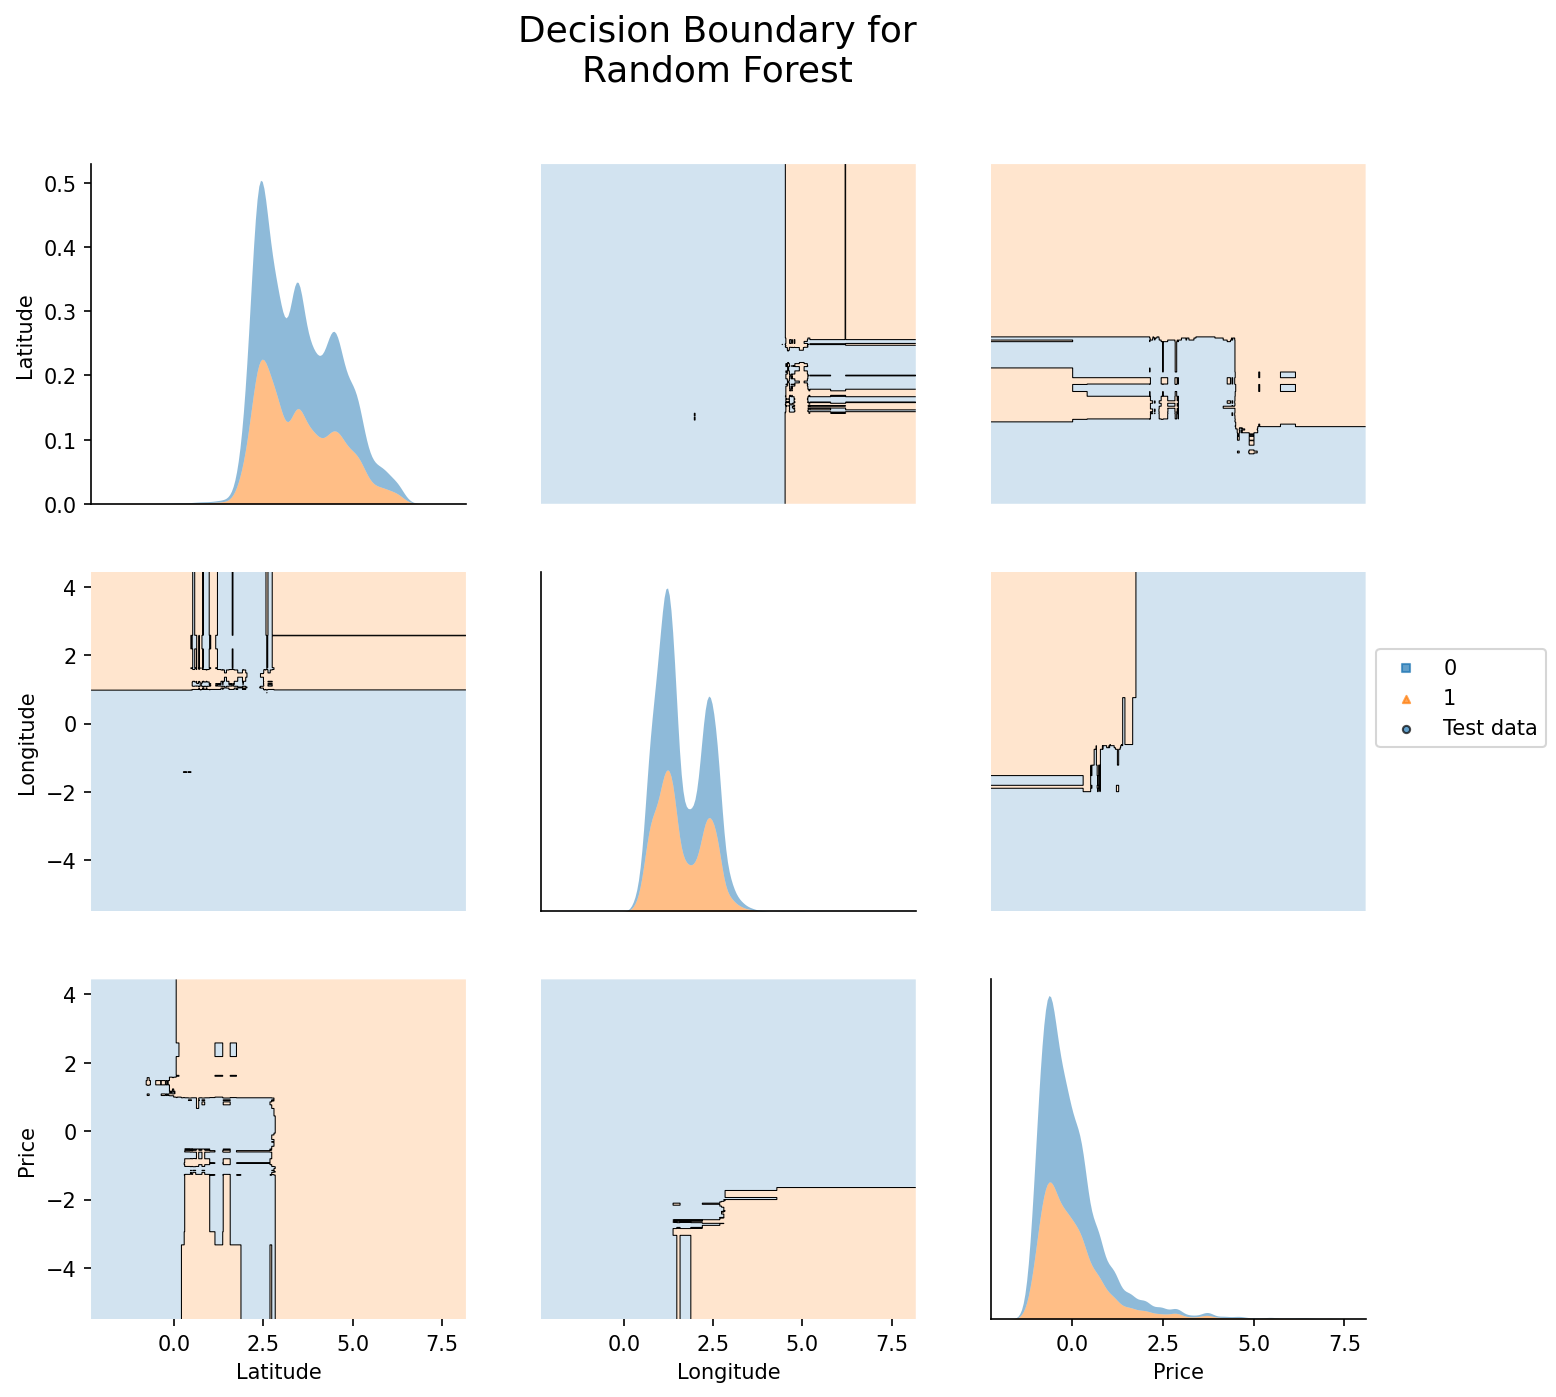

In [6]:
from decision_region import pairplot_with_decision_regions
pairplot_with_decision_regions(
    "Random Forest",
    classifiers["Random Forest"],
    df,
    X,
    y.astype(int),
    X_test,
    feature_indices=[
        3,
        4,
        9,
    ],
    feature_names=[
        "Latitude",
        "Longitude",
        "Price",
    ],
    filler_values=[0] * (len(df.columns.tolist()) - 1),
    filler_ranges=[1] * (len(df.columns.tolist()) - 1),
)
